<a href="https://colab.research.google.com/github/bemakerorg/AIoT_Book_RF/blob/main/AIoT_RF_Book_ES_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importiamo la Libreria Open Source di TensorFlow
import tensorflow as tf
# Facciamo stampare la versione della Libreria
print(tf.__version__)
# Importiamo la Libreria matematica di Python
import numpy as np
# Importiamo la Libreria per il plottaggio molto utile per la visualizzazione
import matplotlib.pyplot as plt

2.15.0


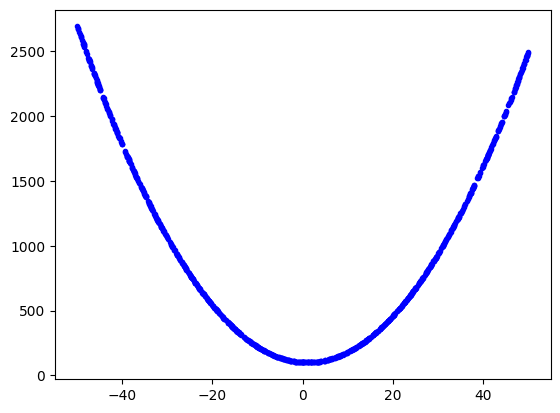

In [6]:
# Fissiamo il numero di dati che costituiranno il mio Dataset
Num_Punti = 1000

# Poichè generemo dei numeri casuali, è suggeribile fissare il seme cioè SEED
# in questo modo ogni volta che lanciamo il Colab si hanno numeri casuali con lo stesso seme
Seed = 1337

# Inizializziamo il generatore di numeri casuali in TensorFlow fissandone il seme
np.random.seed(Seed)
tf.random.set_seed(Seed)

# Facciamo costruire un array di nome x_value composto da Num_Punti casuali tra un valore minimo
# di -100 ed un valore massimo di +100
x_values = np.random.uniform(low=-50, high=50, size=Num_Punti)

# Facciamo mescolare casualmente con la funzione shuffle i valori di x
np.random.shuffle(x_values)

# Calcoliamo il corrispondente valore y partendo dalla funzione nota
# y = x^2 – 2 x + 100
y_values = x_values * x_values - 2 * x_values + 100

# Facciamo plottare il risultato, ovvero l'array delle x e quello delle y
plt.plot(x_values, y_values, 'b.')
plt.show()

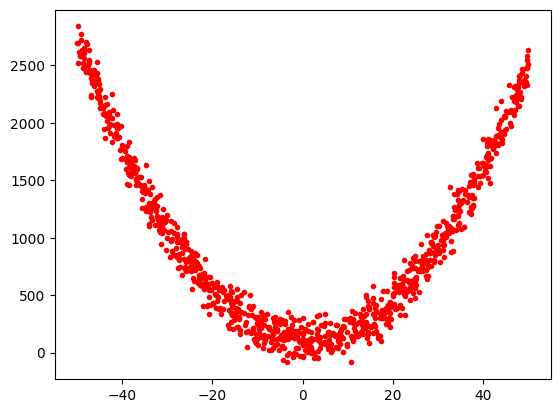

In [7]:
# Per simulare una raccolta vera di dati è opportuno aggiungere del rumore
y_values += 100 * np.random.randn(*y_values.shape)

# Facciamo plottare ora i valori di y con il rumore aggiunto di colore rosso
plt.plot(x_values, y_values, 'r.')
plt.show()


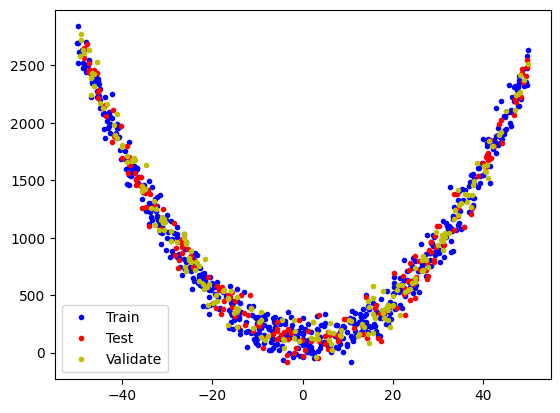

In [4]:
# Usiamo il 60% dei dati per l'addestramento ed il 20% dei dati per il Test
# il restante 20% dei dati li usiamo per la validazione
TRAIN_SPLIT =  int(0.6 * Num_Punti)
TEST_SPLIT = int(0.2 * Num_Punti + TRAIN_SPLIT)

# Usa np.split per dividere i nostri dati in tre parti.
# Il secondo argomento di np.split è un array di indici in cui si troveranno i dati
# divisi. Forniamo due indici, quindi i dati verranno divisi in tre blocchi.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Ricontrolliamo che le nostre suddivisioni si sommano correttamente
assert (x_train.size + x_test.size + x_validate.size) ==  Num_Punti

# Plotta gli insiemi di dati in colori differenti
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()